In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import shap
import joblib

In [53]:
# Stap 1: Dataset inladen
df = pd.read_csv("./heart-disease-diagnosis-dataset/dataset_heart.csv")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [55]:
print("Dataset vorm:", df.shape)
print("\nEerste 5 rijen:")
print(df.head())
print("\nBeschrijvende statistieken:")
print(df.describe())
print("\nOntbrekende waarden:", df.isnull().sum())

Dataset vorm: (270, 14)

Eerste 5 rijen:
   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced a

In [56]:
df.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

In [57]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [58]:
mapping = {1: 0, 2: 1}
df['heart disease'] = [mapping[label] for label in df['heart disease']]
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [59]:
df.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

In [60]:
columns = ['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease']

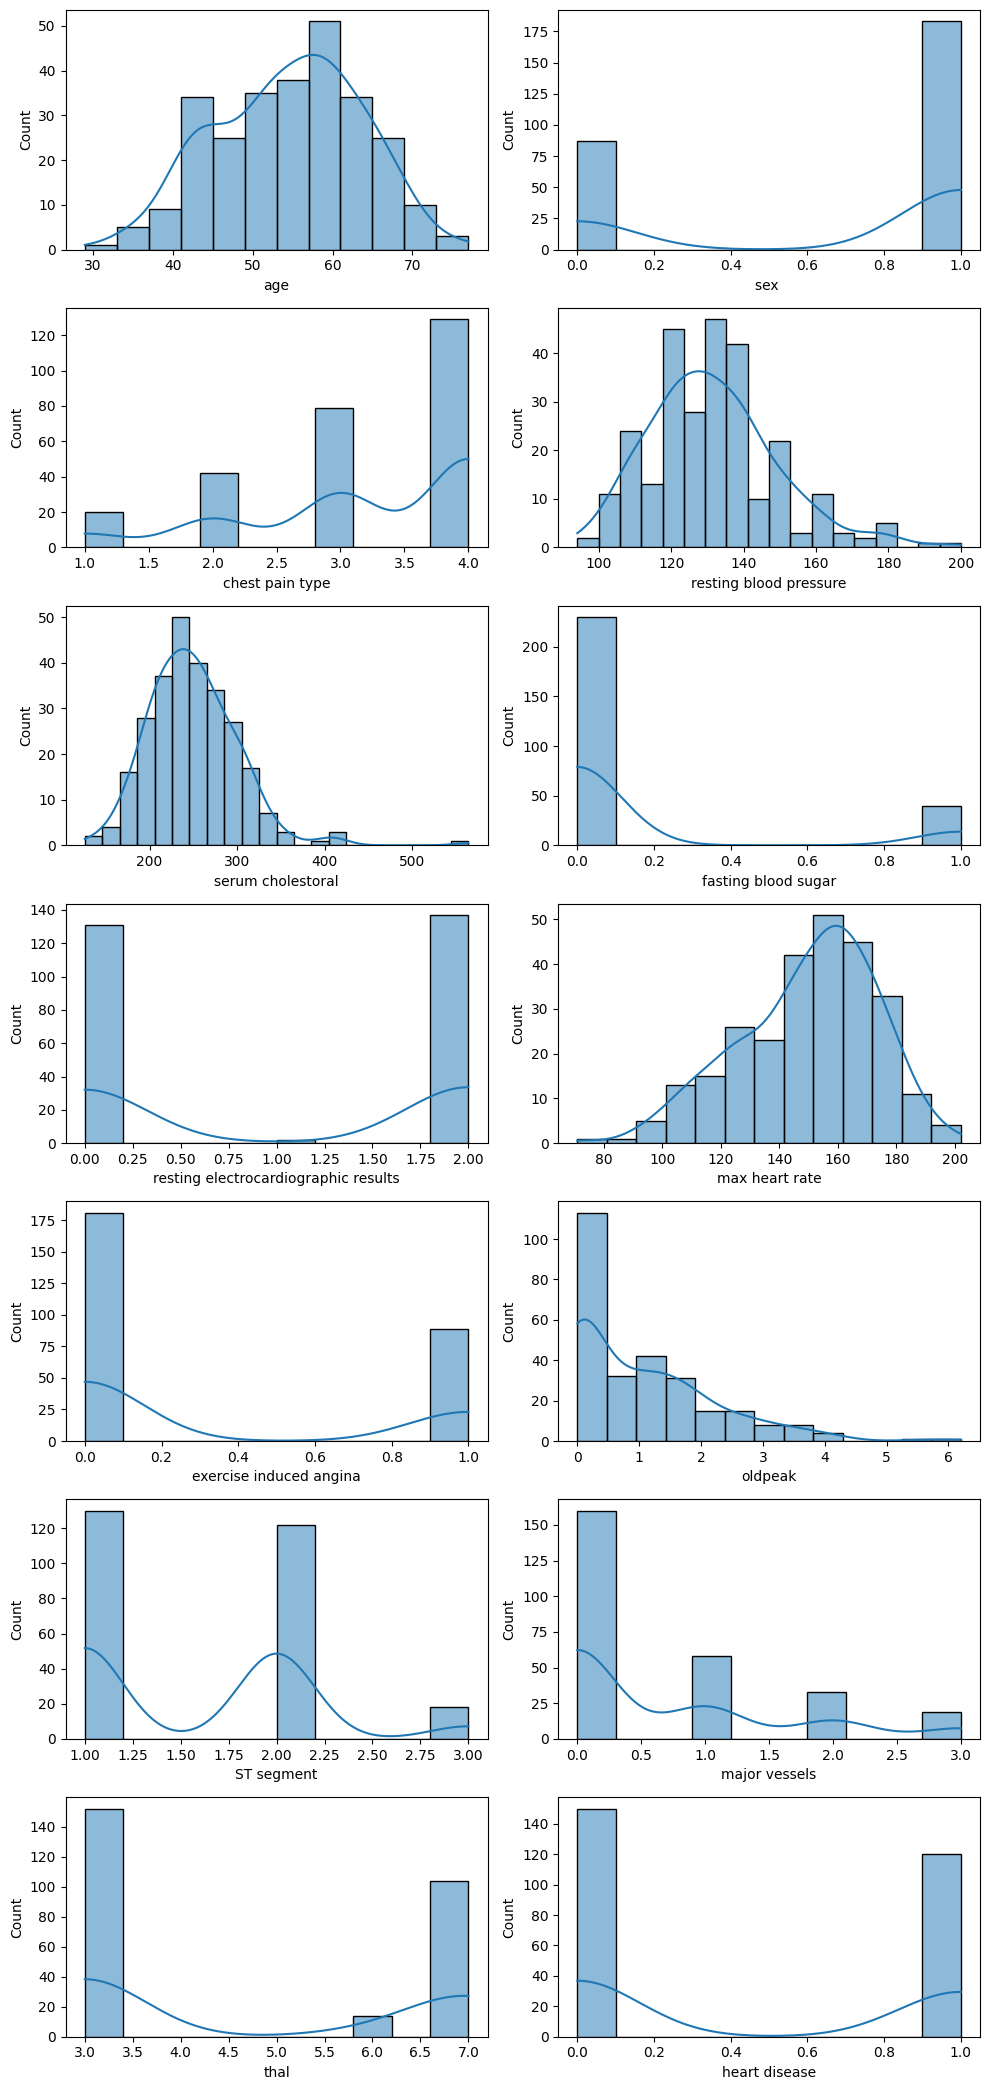

In [61]:
num_rows = (len(columns) + 1) // 2  
plt.figure(figsize=(10, num_rows * 3))

for i, column in enumerate(columns, 1):
    plt.subplot(num_rows, 2, i) 
    sns.histplot(df[column], kde=True)   
    plt.tight_layout() 
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same e

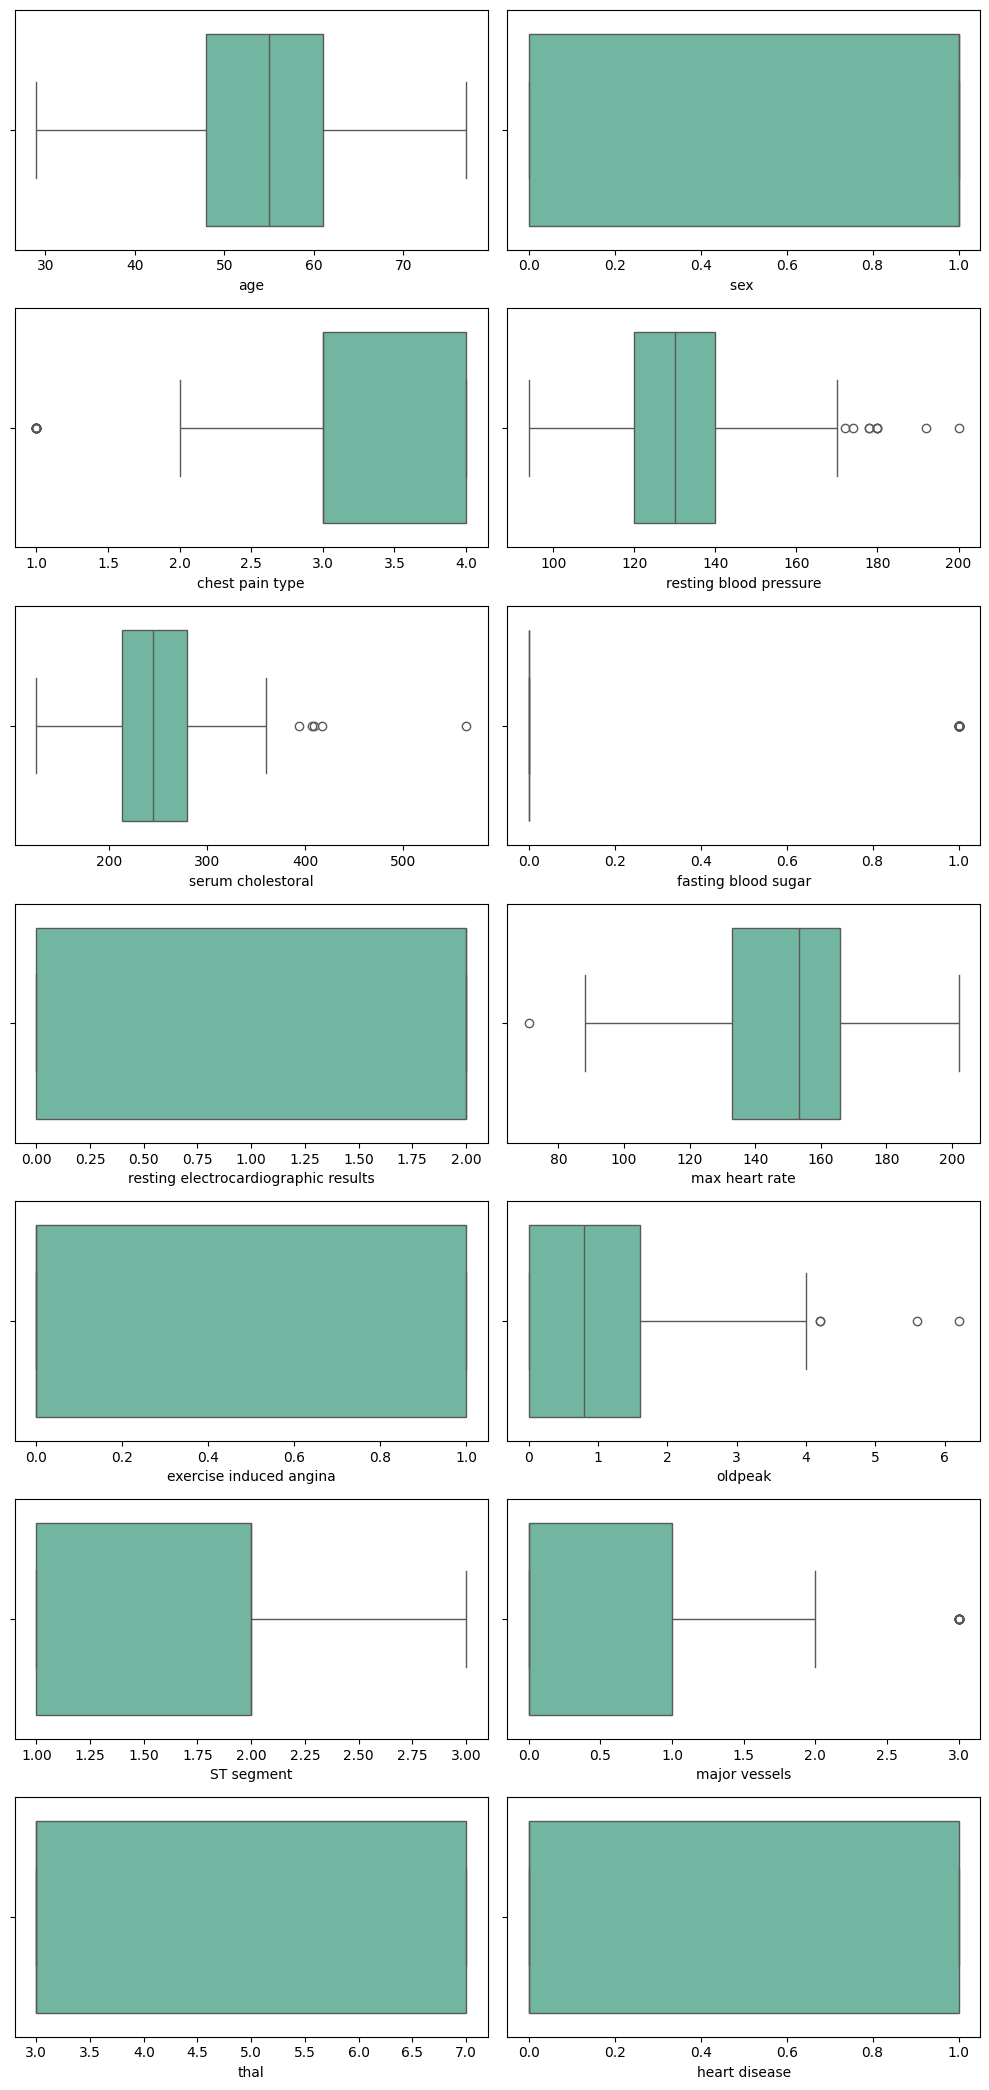

In [62]:
num_rows = (len(columns) + 1) // 2  
plt.figure(figsize=(10, num_rows * 3))

for i, column in enumerate(columns, 1):
    plt.subplot(num_rows, 2, i) 
    sns.boxplot(x=df[column], palette='Set2')  
    plt.tight_layout() 

plt.show()

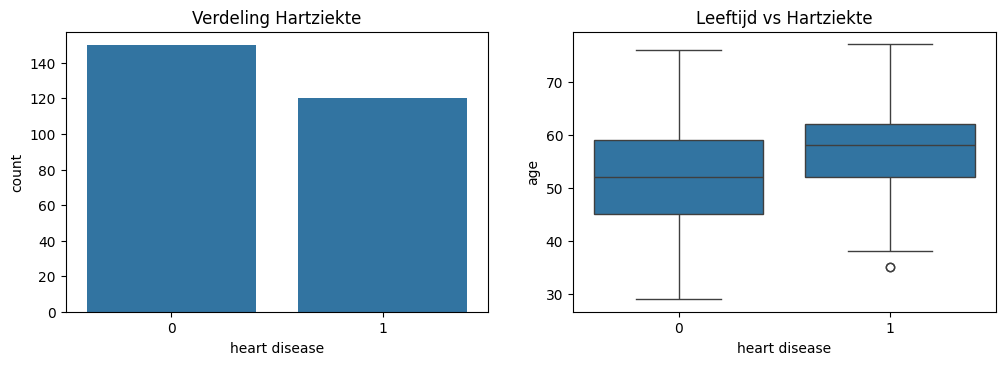

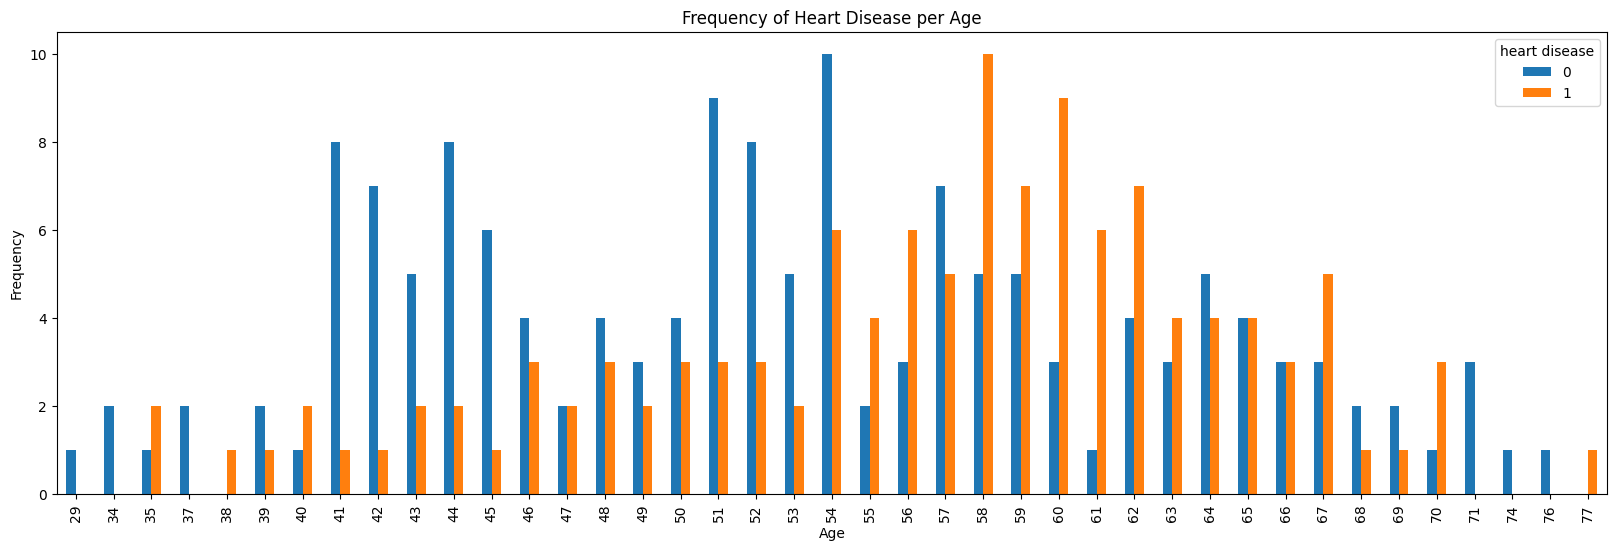

In [63]:
# ---------------
# 3. Uitgebreide EDA met visualisaties
# ---------------
plt.figure(figsize=(12,8))

# Distributie van hartziekte
plt.subplot(2,2,1)
sns.countplot(x='heart disease', data=df)
plt.title('Verdeling Hartziekte')

# Leeftijd vs Hartziekte
plt.subplot(2,2,2)
sns.boxplot(x='heart disease', y='age', data=df)
plt.title('Leeftijd vs Hartziekte')

pd.crosstab(df.age, df['heart disease']).plot(kind="bar", figsize=(20, 6))
plt.title('Frequency of Heart Disease per Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()





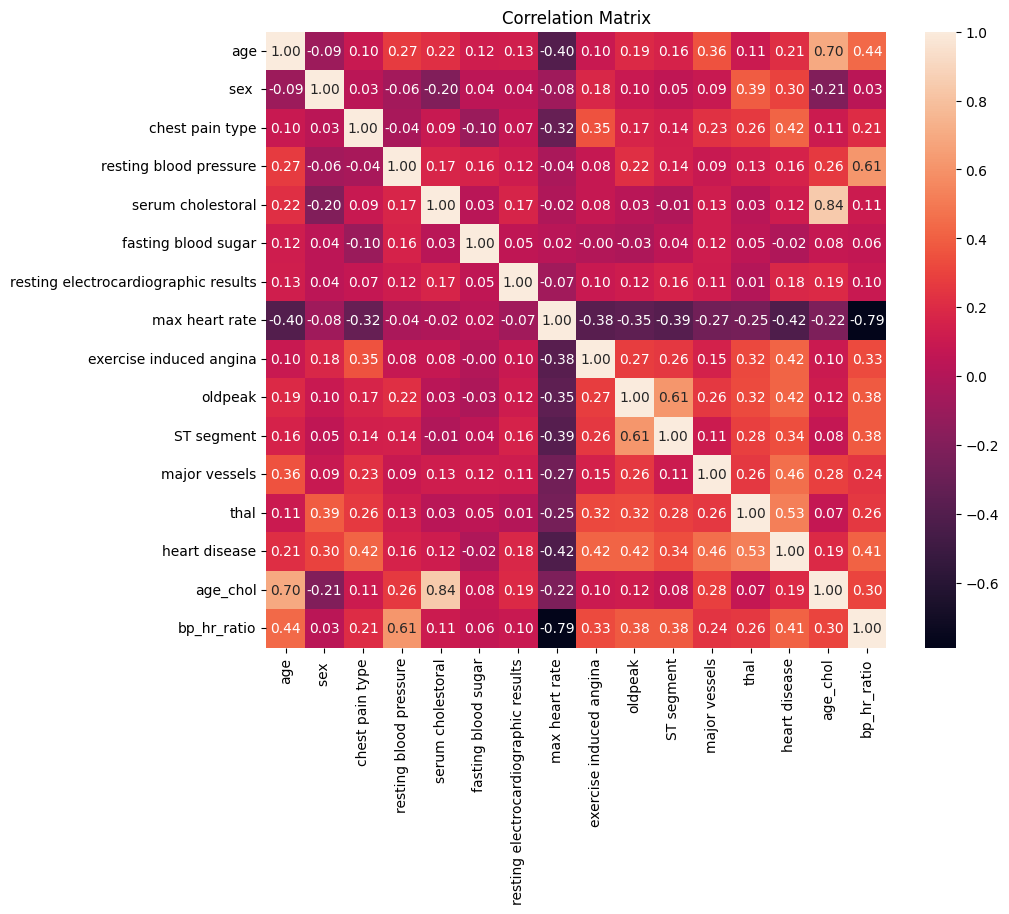

Most important correlations with heart disease:
heart disease                           1.000000
thal                                    0.525020
major vessels                           0.455336
exercise induced angina                 0.419303
oldpeak                                 0.417967
chest pain type                         0.417436
bp_hr_ratio                             0.407814
ST segment                              0.337616
sex                                     0.297721
age                                     0.212322
age_chol                                0.193655
resting electrocardiographic results    0.182091
resting blood pressure                  0.155383
serum cholestoral                       0.118021
fasting blood sugar                    -0.016319
max heart rate                         -0.418514
Name: heart disease, dtype: float64


In [80]:
# Correlatiematrix
corr_matrix = df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mapping the most important correlation coefficients with heart disease in table form
important_corr = corr_matrix['heart disease'].sort_values(ascending=False)
print("Most important correlations with heart disease:")
print(important_corr)


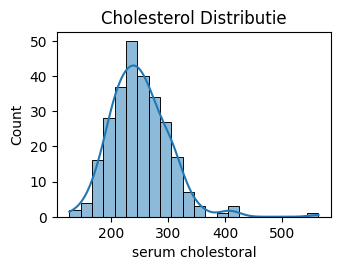

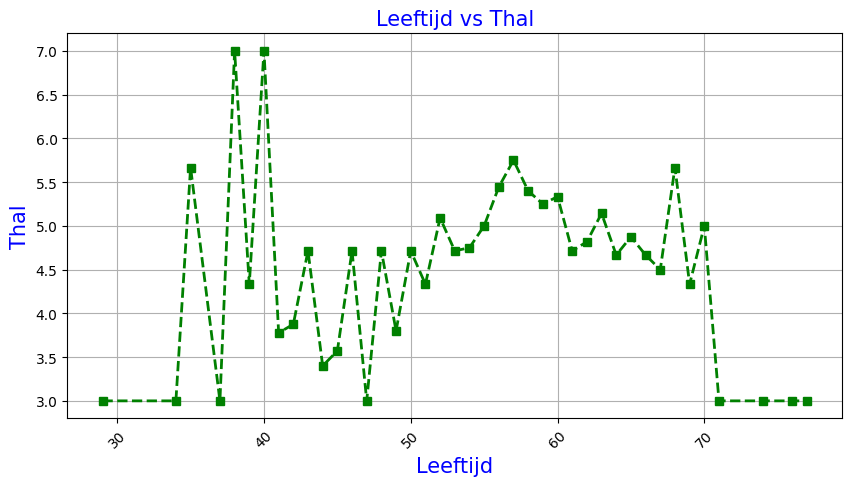

In [65]:
# Feature distributies
plt.subplot(2,2,4)
sns.histplot(df['serum cholestoral'], kde=True)
plt.title('Cholesterol Distributie')

plt.tight_layout()
plt.show()

# thal per age
age_unique = sorted(df.age.unique())
age_thal_values = df.groupby('age')['thal'].count().values
mean_thal = []
for i, age in enumerate(age_unique):
    mean_thal.append(sum(df[df['age'] == age].thal) / age_thal_values[i])

# maken van een line plot
plt.figure(figsize=(10, 5))
plt.plot(age_unique, mean_thal, marker='s', color='green', linestyle='--', linewidth=2)

plt.xlabel('Leeftijd', fontsize=15, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thal', fontsize=15, color='blue')
plt.title('Leeftijd vs Thal', fontsize=15, color='blue')
plt.grid()

plt.show()

In [66]:
# ---------------
# 4. Data Preprocessing
# ---------------
# Feature engineering
df['age_chol'] = df['age'] * df['serum cholestoral']
df['bp_hr_ratio'] = df['resting blood pressure'] / df['max heart rate']

In [67]:
# Splits data
y = df['heart disease']
X = df.drop('heart disease',axis=1)

In [68]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [69]:
# ---------------
# 5. Model Pipeline met SMOTE en Scaling
# ---------------
pipeline = imbpipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier())
])

In [70]:
# Hyperparameter tuning
params = {
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__n_estimators': [100, 200]
}

grid_search = GridSearchCV(pipeline, params, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print(f"Beste parameters: {grid_search.best_params_}")
print(f"Beste ROC-AUC: {grid_search.best_score_:.3f}")

Beste parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Beste ROC-AUC: 0.889



Classificatierapport:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



Text(0.5, 1.0, 'Confusion Matrix')

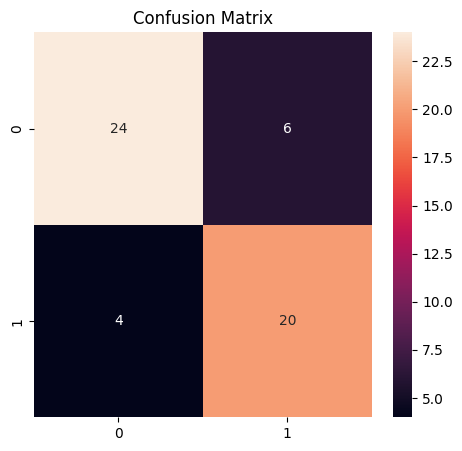

In [71]:
# ---------------
# 6. Model Evaluatie
# ---------------
from sklearn.metrics import roc_curve, auc

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("\nClassificatierapport:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12,5))

# Confusion matrix
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')



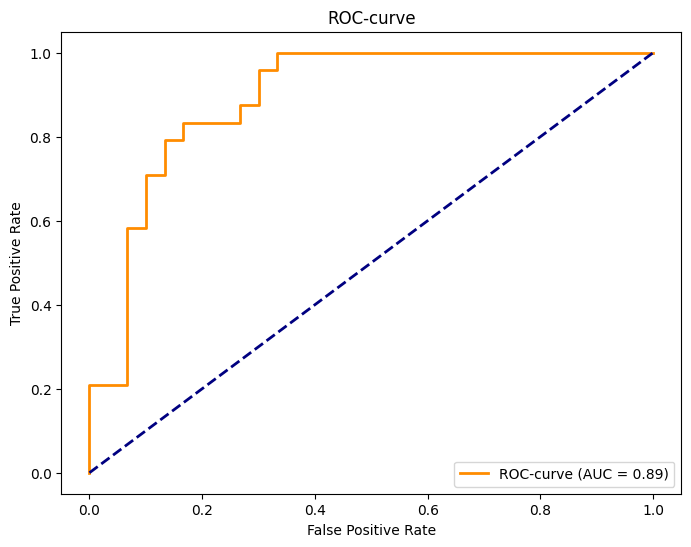

In [72]:
# ROC-curve plot
plt.figure(figsize=(8, 6))  # Expliciet nieuwe figuur
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()
plt.show()

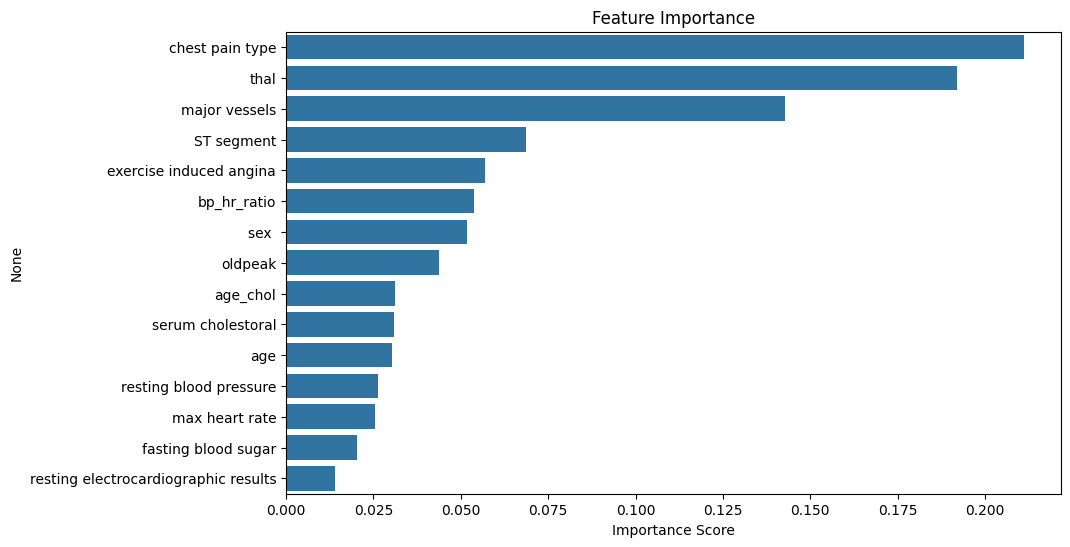

In [73]:
# ---------------
# 7. Feature Importance Analyse
# ---------------
plt.figure(figsize=(10,6))
feature_importance = pd.Series(
    best_model.named_steps['classifier'].feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

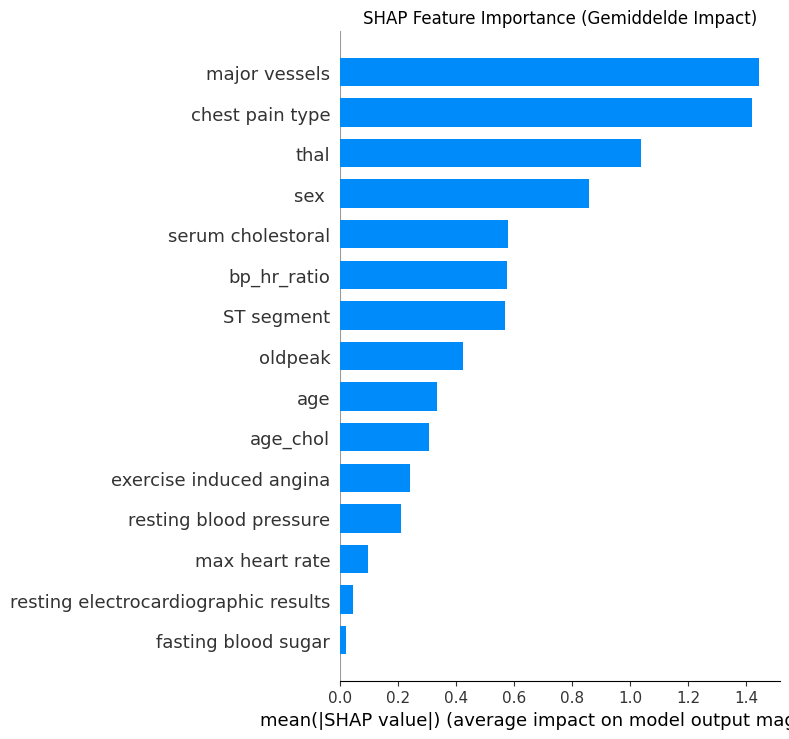

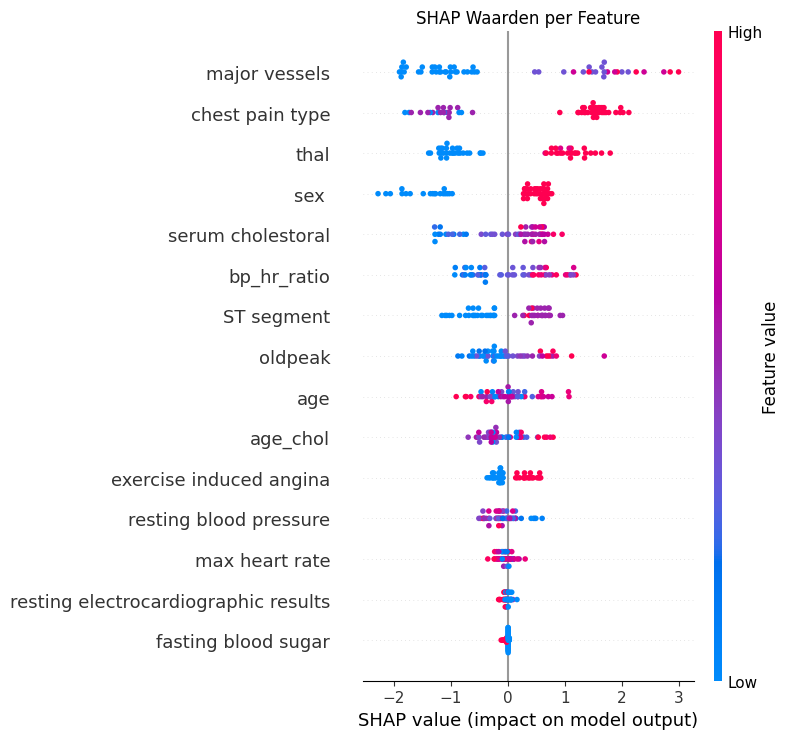

In [74]:
# ---------------
# 8. SHAP Interpretatie
# ---------------
X_test_scaled = pd.DataFrame(
    best_model.named_steps['scaler'].transform(X_test),
    columns=X.columns
)

# SHAP-waarden berekenen
explainer = shap.TreeExplainer(best_model.named_steps['classifier'])
shap_values = explainer.shap_values(X_test_scaled)

# Samenvattingsplot met duidelijke parameters
plt.figure()
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Gemiddelde Impact)")
plt.tight_layout()
plt.show()

plt.figure()
shap.summary_plot(shap_values, X_test_scaled, show=False)
plt.title("SHAP Waarden per Feature")
plt.tight_layout()
plt.show()


In [75]:
# ---------------
# 9. Model Vergelijking
# ---------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
models = {
    "Logistic Regression": LogisticRegression(max_iter=400),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(**grid_search.best_params_),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "AdaBoost": AdaBoostClassifier()
}

results = []

for name, model in models.items():
    pipeline = imbpipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
    results.append({
        'Model': name,
        'Mean ROC-AUC': cv_scores.mean(),
        'Std': cv_scores.std()
    })

results_df = pd.DataFrame(results)
print("\nModelvergelijking:")
print(results_df.sort_values('Mean ROC-AUC', ascending=False))

models = pd.DataFrame(results)
models



[12:25:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "classifier__learning_rate", "classifier__max_depth", "classifier__n_estimators" } are not used.

[12:25:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "classifier__learning_rate", "classifier__max_depth", "classifier__n_estimators" } are not used.

[12:25:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "classifier__learning_rate", "classifier__max_depth", "classifier__n_estimators" } are not used.

[12:25:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "classifier__learning_rate


Modelvergelijking:
                 Model  Mean ROC-AUC       Std
7           GaussianNB      0.898611  0.028599
2        Random Forest      0.896250  0.036514
0  Logistic Regression      0.895833  0.031950
5                  SVC      0.890833  0.019595
4              XGBoost      0.878333  0.049943
6                  KNN      0.875000  0.023007
3    Gradient Boosting      0.861667  0.044959
8             AdaBoost      0.855000  0.052753
1        Decision Tree      0.749167  0.078058


,Model,Mean ROC-AUC,Std
0,Logistic Regression,0.895833,0.031950
1,Decision Tree,0.749167,0.078058
2,Random Forest,0.896250,0.036514
3,Gradient Boosting,0.861667,0.044959
4,XGBoost,0.878333,0.049943
5,SVC,0.890833,0.019595
6,KNN,0.875000,0.023007
7,GaussianNB,0.898611,0.028599
8,AdaBoost,0.855000,0.052753




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



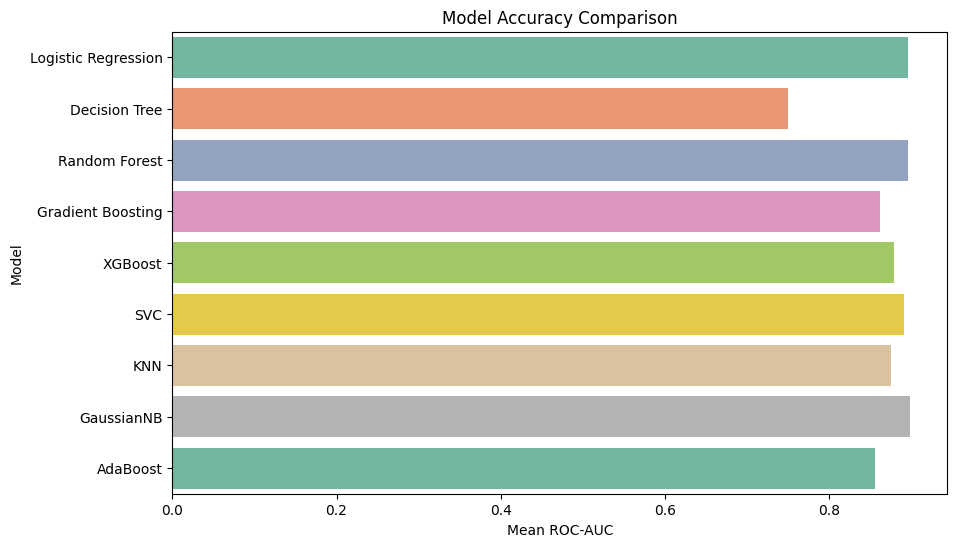

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean ROC-AUC', y='Model', data=models, palette='Set2')
plt.title('Model Accuracy Comparison')
plt.xlabel('Mean ROC-AUC')
plt.ylabel('Model')
plt.show()

Train Accuracy: 84.72%
Test Accuracy: 85.19%
ROC-AUC Score: 89.44%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54


Cross-Validation Results:
Accuracy: 82.96% (±3.39%)
ROC-AUC: 89.58% (±3.20%)


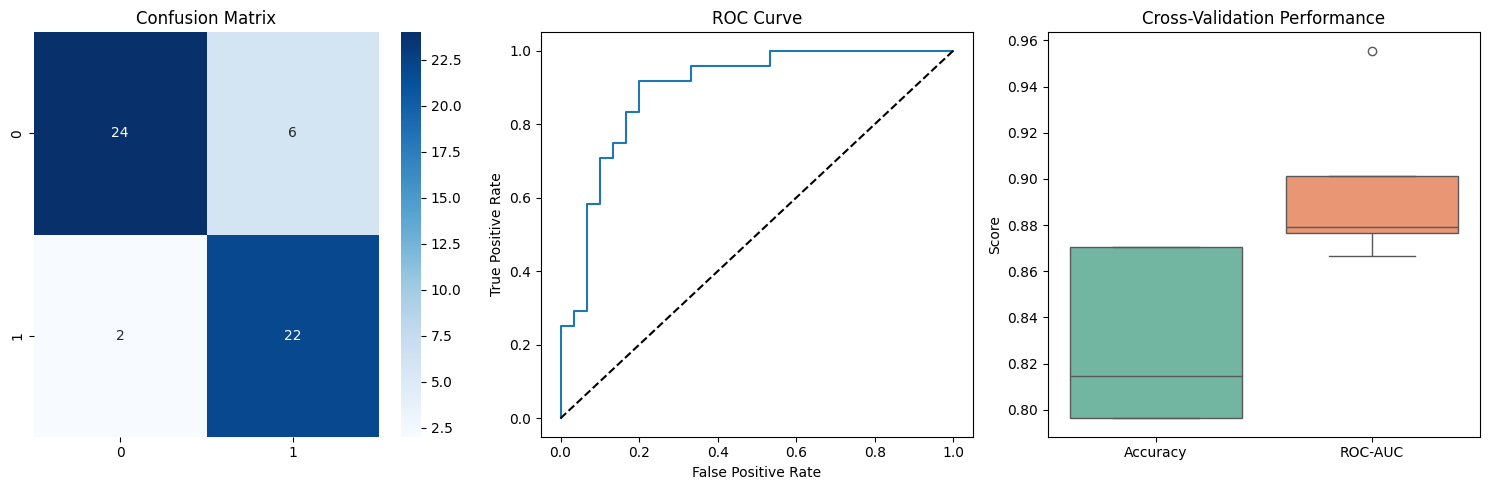

In [77]:
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, 
                             roc_auc_score, roc_curve, confusion_matrix)
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize model with pipeline
pipeline = imbpipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=400))
])

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate metrics
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')

print(f"Train Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"ROC-AUC Score: {roc_auc:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nCross-Validation Results:")
print(f"Accuracy: {cv_scores.mean():.2%} (±{cv_scores.std():.2%})")
print(f"ROC-AUC: {cv_roc_auc.mean():.2%} (±{cv_roc_auc.std():.2%})")

# Visualizations
plt.figure(figsize=(15, 5))

# 1. Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

# 2. ROC Curve
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2%})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# 3. Cross-Validation Distribution
plt.subplot(1, 3, 3)
sns.boxplot(data=[cv_scores, cv_roc_auc], palette='Set2')
plt.xticks([0, 1], ['Accuracy', 'ROC-AUC'])
plt.title('Cross-Validation Performance')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

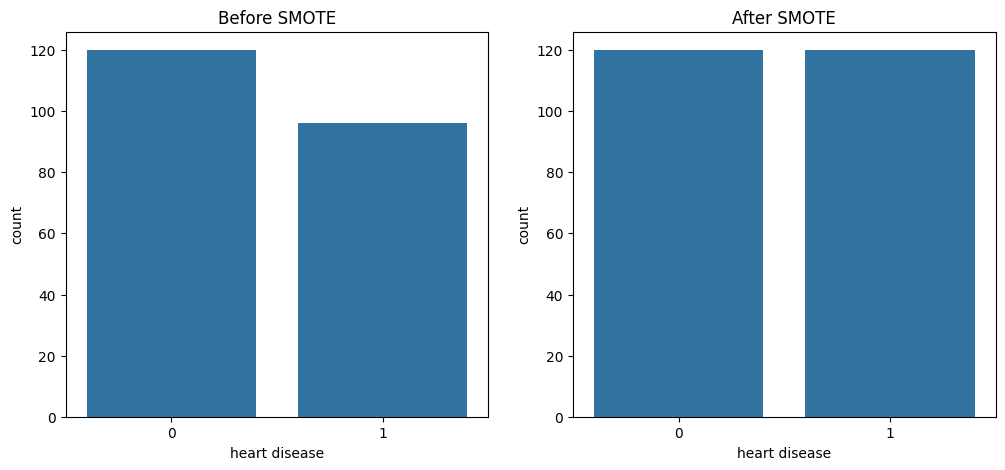

Class Distribution Before SMOTE:
Counter({0: 120, 1: 96})

Class Distribution After SMOTE:
Counter({0: 120, 1: 120})


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter  # Import Counter

# Apply SMOTE to generate resampled data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Visualize the class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Before SMOTE')

# After SMOTE
sns.countplot(x=y_resampled, ax=axes[1])
axes[1].set_title('After SMOTE')

plt.show()

# Display the counts in a table format
print("Class Distribution Before SMOTE:")
print(Counter(y_train))

print("\nClass Distribution After SMOTE:")
print(Counter(y_resampled))


In [79]:
# ---------------
# 10. Opslaan model
# ---------------
# joblib.dump(best_model, 'heart_disease_model.pkl')
# print("\nModel opgeslagen als heart_disease_model.pkl")